In [1]:
# 1) Visualise the time series
# 2) Stationarize the time series
# 3) Plot ACF/PCF plots and find optimal parametres
# 4) Build the ARIMA model 
# 5) Make predictions 

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [77]:
jet_rail= pd.read_csv("/Users/keerthinandan/Documents/jet_rail/Train_SU63ISt.csv", parse_dates=["Datetime"], index_col=["Datetime"])

In [3]:
jet_rail.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


In [7]:
jet_rail.index

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq=None)

In [78]:
ts= jet_rail.reindex(columns=['Count'])

In [79]:
ts.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [25]:
ts.tail()

,Count
Datetime,
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702
2014-09-25 22:00:00,580
2014-09-25 23:00:00,534


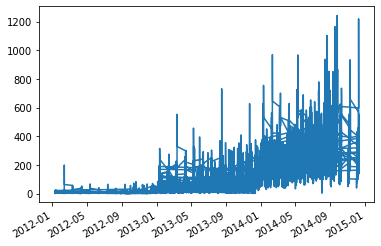

In [60]:
plt.plot(jet_rail.Count)
plt.gcf().autofmt_xdate()

In [61]:
ts.describe()

,Count
count,18288.000000
mean,138.958115
std,153.467461
min,2.000000
25%,22.000000
50%,84.000000
75%,210.000000
max,1244.000000


In [62]:
ts.shape

(18288, 1)

In [67]:
ts.shape[0]

18288

In [80]:
daily = ts.resample('D', how= 'sum')      ## Daily

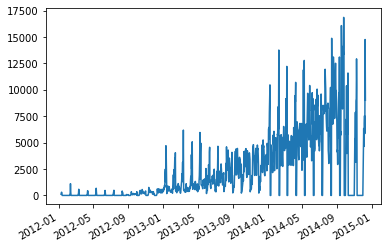

In [7]:
plt.plot(daily)
plt.gcf().autofmt_xdate()

In [91]:
monthly=ts.resample('M', how='sum')       ## monthly 

monthly.tail()

In [37]:
monthly.describe()

,Count
count,36.000000
mean,70590.722222
std,72598.784835
min,874.000000
25%,5698.500000
50%,51359.000000
75%,99812.500000
max,243652.000000


In [38]:
monthly.tail()

,Count
Datetime,
2014-08-31,243652
2014-09-30,213568
2014-10-31,67632
2014-11-30,65754
2014-12-31,62464


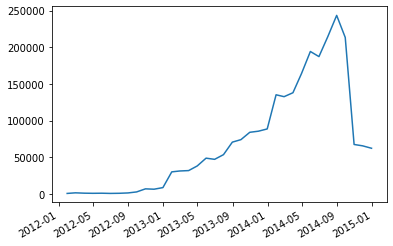

In [42]:
plt.plot(monthly)
plt.gcf().autofmt_xdate()

In [44]:
p=ts["2014-05":"2015-01"]

In [47]:
s=p.resample('D', how='sum')

/Users/keerthinandan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


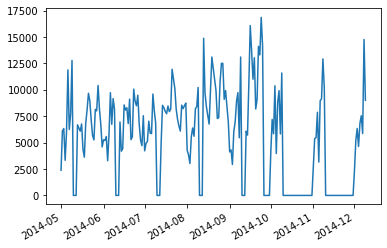

In [48]:
plt.plot(s)
plt.gcf().autofmt_xdate()

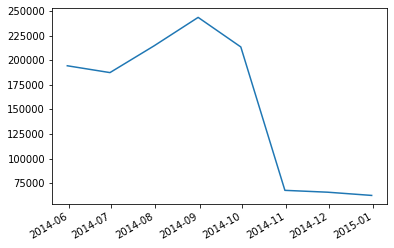

In [52]:
plt.plot(monthly['2014-05':'2014-12'])
plt.gcf().autofmt_xdate()

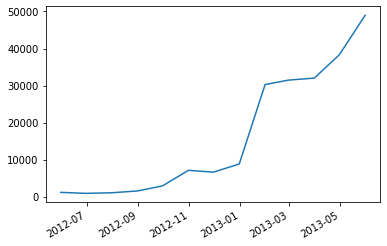

In [55]:
plt.plot(monthly['2012-05':'2013-05'])
plt.gcf().autofmt_xdate()

In [28]:
pd.date_range('2012-08-25', '2014-08-25', freq='M')

DatetimeIndex(['2012-08-31', '2012-09-30', '2012-10-31', '2012-11-30',
               '2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31',
               '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31',
               '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30',
               '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31',
               '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31'],
              dtype='datetime64[ns]', freq='M')

# converting series to  stationary 

In [68]:
ts.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [75]:
ts[01:00:00]

SyntaxError: invalid token (<ipython-input-75-4e75e1bcee8d>, line 1)

In [8]:
ts_diff=ts.diff(periods=1) 
ts_diff=ts_diff[1:]
#integrated order of 1 =d = parameter of ARIMA model

In [9]:
ts_diff.head()

,Count
Datetime,
2012-08-25 01:00:00,-6.0
2012-08-25 02:00:00,4.0
2012-08-25 03:00:00,-4.0
2012-08-25 04:00:00,0.0
2012-08-25 05:00:00,0.0


In [83]:
from statsmodels.graphics.tsaplots import plot_acf

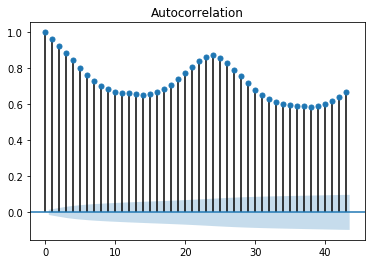

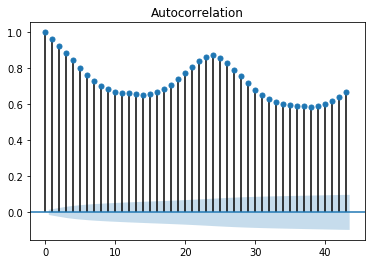

In [76]:
plot_acf(ts)

In [12]:
ts_diff.head()

,Count
Datetime,
2012-08-25 01:00:00,-6.0
2012-08-25 02:00:00,4.0
2012-08-25 03:00:00,-4.0
2012-08-25 04:00:00,0.0
2012-08-25 05:00:00,0.0


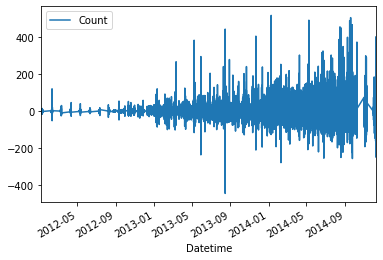

In [73]:
ts_diff.plot()

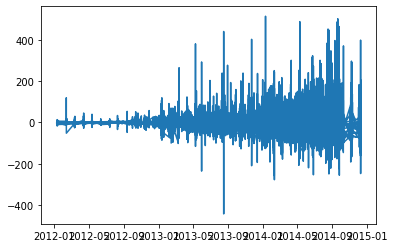

In [79]:
plt.plot(ts_diff)

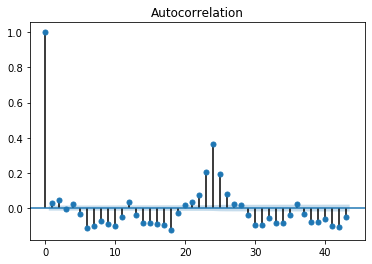

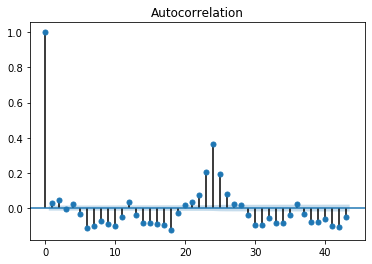

In [27]:
plot_acf(ts_diff)

In [78]:
ts.shift(1)

,Count
Datetime,
2012-08-25 00:00:00,NaN
2012-08-25 01:00:00,8.0
2012-08-25 02:00:00,2.0
2012-08-25 03:00:00,6.0
2012-08-25 04:00:00,2.0
...,...
2014-09-25 19:00:00,680.0
2014-09-25 20:00:00,868.0
2014-09-25 21:00:00,732.0


In [14]:
ts.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [15]:
ts.tail()

,Count
Datetime,
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702
2014-09-25 22:00:00,580
2014-09-25 23:00:00,534


In [16]:
ts2=ts['2012-08':'2014-06']

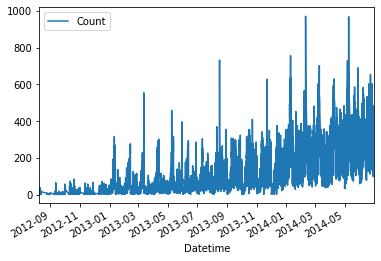

In [18]:
ts2.plot()

In [19]:
ts2_diff=ts2.diff(periods=1)

In [21]:
ts2_diff=ts2_diff[1:]

In [22]:
ts2_diff.head()

,Count
Datetime,
2012-08-25 01:00:00,-6.0
2012-08-25 02:00:00,4.0
2012-08-25 03:00:00,-4.0
2012-08-25 04:00:00,0.0
2012-08-25 05:00:00,0.0


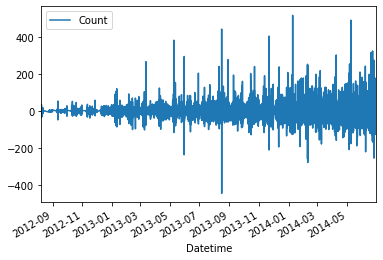

In [23]:
ts2_diff.plot()

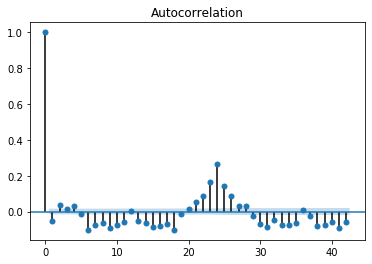

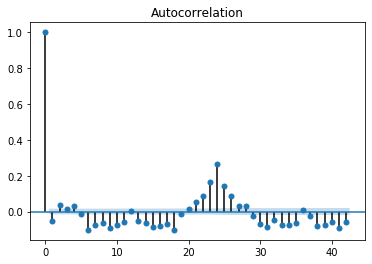

In [28]:
plot_acf(ts2_diff)

# AR model

In [13]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
predictions= []

In [14]:
X=ts["Count"]

In [71]:
X

Datetime
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2
                      ... 
2014-09-25 19:00:00    868
2014-09-25 20:00:00    732
2014-09-25 21:00:00    702
2014-09-25 22:00:00    580
2014-09-25 23:00:00    534
Name: Count, Length: 18288, dtype: int64

In [15]:
X.size

18288

In [11]:
18288-14630

3658

In [16]:
train=X[0:14630]
test=X[14630:]

In [17]:
model_ar = AR(train)
model_ar_fit=model_ar.fit()

In [18]:
predictions=model_ar_fit.predict(start=14630,end=18287)

In [19]:
predictions.size

3658

In [20]:
test.size

3658

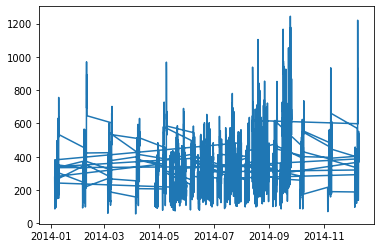

In [21]:
plt.plot(test)


In [67]:
test.head()

Datetime
2014-03-19 12:00:00    296
2014-03-19 13:00:00    216
2014-03-19 14:00:00    226
2014-03-19 15:00:00    276
2014-03-19 16:00:00    226
Name: Count, dtype: int64

In [79]:
type(X)

pandas.core.series.Series

In [22]:
type(test)

pandas.core.series.Series

In [23]:
type(predictions)

pandas.core.series.Series

In [24]:
predictions.tail()

18283    89.322386
18284    89.322386
18285    89.322386
18286    89.322386
18287    89.322386
dtype: float64

In [25]:
predictions.tail(2500)

15788    89.601808
15789    89.600623
15790    89.599233
15791    89.597638
15792    89.595851
           ...    
18283    89.322386
18284    89.322386
18285    89.322386
18286    89.322386
18287    89.322386
Length: 2500, dtype: float64

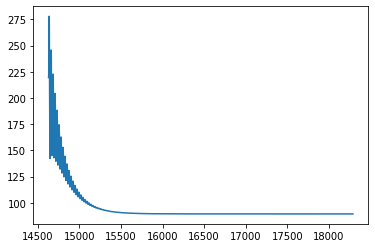

In [26]:
plt.plot(predictions)

In [100]:
import numpy as np

In [102]:
t= np.array([5,6,7,8,9,5])

In [103]:
t

array([5, 6, 7, 8, 9, 5])

In [104]:
t[0:3]

array([5, 6, 7])

In [105]:
t[3:]

array([8, 9, 5])

In [114]:
type(X)

pandas.core.series.Series

In [119]:
p.index

RangeIndex(start=13716, stop=18288, step=1)

In [27]:
test=test.reset_index(drop=True)

In [28]:
test.tail()

3653    868
3654    732
3655    702
3656    580
3657    534
Name: Count, dtype: int64

In [29]:
test.describe()

count    3658.000000
mean      349.220339
std       172.738753
min        56.000000
25%       216.000000
50%       322.000000
75%       446.000000
max      1244.000000
Name: Count, dtype: float64

In [31]:
predictions=predictions.reset_index(drop=True)

In [139]:
p.describe()

count    4572.000000
mean       87.522374
std        25.620569
min        81.041825
25%        81.041826
50%        81.042150
75%        81.267593
max       365.096099
dtype: float64

In [32]:
predictions.tail()

3653    89.322386
3654    89.322386
3655    89.322386
3656    89.322386
3657    89.322386
dtype: float64

In [47]:
test.count

<bound method Series.count of 0       204
1       172
2       184
3       124
4       190
       ... 
3653    868
3654    732
3655    702
3656    580
3657    534
Name: Count, Length: 3658, dtype: int64>

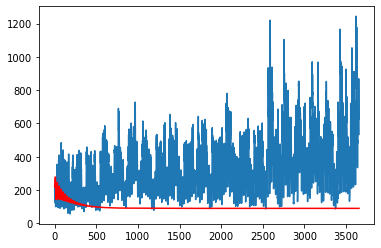

In [33]:
plt.plot(test)
plt.plot(predictions,color='RED')

# ARIMA model  auto regressive integrated moving average  model

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
model_arima = ARIMA(train,order=(3,1,2))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

137639.34332680478


In [69]:
predictions=model_arima_fit.forecast(steps=3658)[0]
predictions

array([217.87493213, 222.34937274, 227.46447519, ..., 296.89264524,
       296.90894499, 296.92524474])

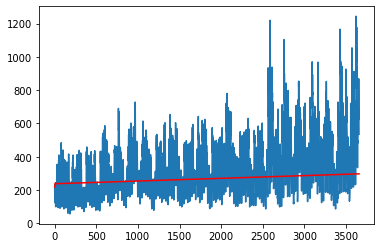

In [70]:
plt.plot(test)
plt.plot(predictions,color='RED')

In [64]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [67]:
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue  

(0, 0, 0) 173299.77375319228
(0, 0, 1) 159417.41831154528
(0, 0, 2) 151799.65714255598
(0, 0, 3) 147306.2877836609
(0, 0, 4) 145004.63588550856
(0, 1, 0) 138975.89798163407
(0, 1, 1) 138868.71383601372
(0, 1, 2) 138826.01792470575
(0, 1, 3) 138824.959529425
(0, 1, 4) 138819.3975086837
(0, 2, 0) 150373.69461603413
(0, 2, 1) 138979.01247923123
(1, 0, 0) 138635.3600990438
(1, 0, 1) 138578.21786926017
(1, 0, 2) 138499.91038784364
(1, 0, 3) 138481.9266474982
(1, 0, 4) 138441.00788862185
(1, 1, 0) 138857.60633645067
(1, 1, 1) 138059.25809999803
(1, 1, 2) 138050.89919981352
(1, 1, 3) 137898.86512944248
(1, 1, 4) 137837.16920545118
(1, 2, 0) 144726.06966363988
(1, 2, 4) 138832.2791037615
(2, 0, 0) 138569.235527836
(2, 0, 1) 138091.934553523
(2, 0, 2) 138083.30186749116
(2, 0, 3) 137931.59241652527
(2, 0, 4) 137871.36839840852
(2, 1, 0) 138828.98166299643
(2, 1, 1) 138048.2846532623
(2, 1, 2) 138012.80589017627
(2, 1, 3) 137225.21676532886
(2, 1, 4) 137590.91218488038
(2, 2, 0) 142880.330387761

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(test,predictions)
rmse=sqrt(mse)

In [72]:
rmse

185.7139996050194

In [81]:
daily

,Count
Datetime,
2012-01-09,112
2012-01-10,248
2012-01-11,304
2012-01-12,210
2012-01-13,0
...,...
2014-12-05,6826
2014-12-06,7540
2014-12-07,5858


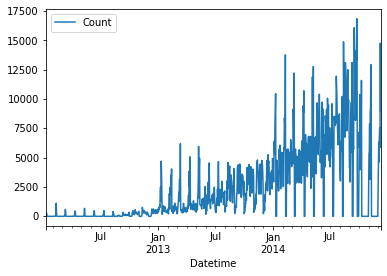

In [82]:
daily.plot()

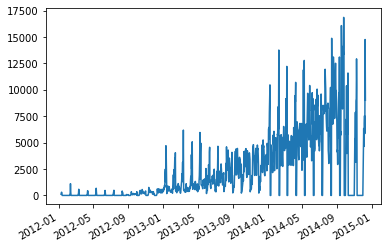

In [85]:
plt.plot(daily)
plt.gcf().autofmt_xdate()

In [88]:
daily_diff=daily.diff(periods=1)
daily_diff=daily_diff[1:]

In [89]:
daily_diff

,Count
Datetime,
2012-01-10,136.0
2012-01-11,56.0
2012-01-12,-94.0
2012-01-13,-210.0
2012-01-14,0.0
...,...
2014-12-05,2190.0
2014-12-06,714.0
2014-12-07,-1682.0


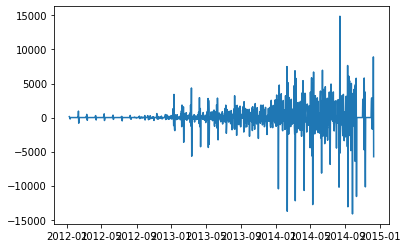

In [90]:
plt.plot(daily_diff)

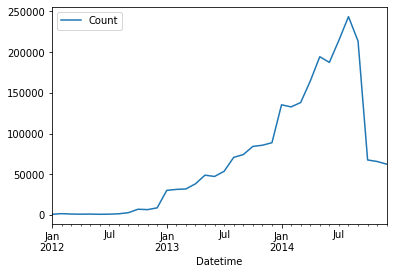

In [92]:
monthly.plot()

In [101]:
monthly_diff=monthly.diff(periods=1)

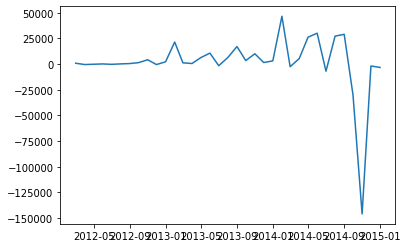

In [102]:
plt.plot(monthly_diff)

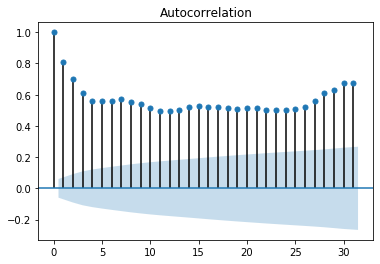

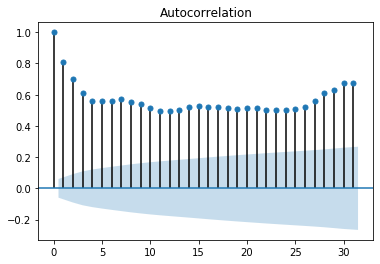

In [104]:
plot_acf(daily)

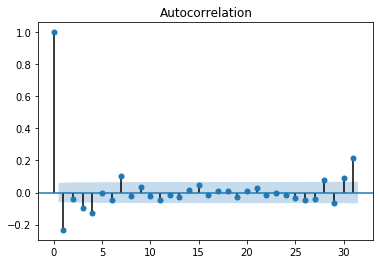

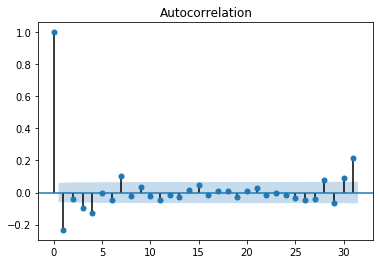

In [105]:
plot_acf(daily_diff)

In [106]:
daily.describe()

,Count
count,1066.000000
mean,2383.926829
std,3141.995353
min,0.000000
25%,0.000000
50%,789.000000
75%,3986.500000
max,16856.000000


In [107]:
.8*1066

852.8000000000001

In [108]:
type(daily)

pandas.core.frame.DataFrame

In [110]:
d=daily['Count']

In [111]:
d

Datetime
2012-01-09      112
2012-01-10      248
2012-01-11      304
2012-01-12      210
2012-01-13        0
              ...  
2014-12-05     6826
2014-12-06     7540
2014-12-07     5858
2014-12-08    14762
2014-12-09     9010
Freq: D, Name: Count, Length: 1066, dtype: int64

In [112]:
train=d[0:852]
test=d[852:]

In [113]:
train

Datetime
2012-01-09      112
2012-01-10      248
2012-01-11      304
2012-01-12      210
2012-01-13        0
              ...  
2014-05-05     6042
2014-05-06    11886
2014-05-07     6250
2014-05-08     7724
2014-05-09    12780
Freq: D, Name: Count, Length: 852, dtype: int64

In [114]:
test

Datetime
2014-05-10        0
2014-05-11        0
2014-05-12        0
2014-05-13     6686
2014-05-14     6390
              ...  
2014-12-05     6826
2014-12-06     7540
2014-12-07     5858
2014-12-08    14762
2014-12-09     9010
Freq: D, Name: Count, Length: 214, dtype: int64

In [115]:
from statsmodels.tsa.arima_model import ARIMA

In [116]:
model_arima = ARIMA(train,order=(1,1,1))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

14472.139276767022


In [117]:
predictions=model_arima_fit.forecast(steps=214)[0]
predictions

array([8863.80112638, 7166.26342297, 6432.71732154, 6118.01832537,
       5985.30524818, 5931.6636849 , 5912.37810008, 5908.01992966,
       5910.1476086 , 5915.09334033, 5921.26349482, 5927.9656518 ,
       5934.89895986, 5941.93270132, 5949.01008035, 5956.10641956,
       5963.21099684, 5970.31915349, 5977.42886536, 5984.53925295,
       5991.64993414, 5998.7607429 , 6005.87160709, 6012.98249535,
       6020.09339408, 6027.20429736, 6034.31520261, 6041.42610872,
       6048.53701521, 6055.64792185, 6062.75882857, 6069.86973532,
       6076.98064208, 6084.09154884, 6091.20245561, 6098.31336238,
       6105.42426915, 6112.53517592, 6119.64608269, 6126.75698946,
       6133.86789623, 6140.978803  , 6148.08970977, 6155.20061654,
       6162.31152331, 6169.42243008, 6176.53333685, 6183.64424362,
       6190.75515039, 6197.86605716, 6204.97696393, 6212.0878707 ,
       6219.19877747, 6226.30968424, 6233.42059101, 6240.53149778,
       6247.64240455, 6254.75331132, 6261.86421809, 6268.97512

In [119]:
plt.plot(predictions)
plt.plot(test)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1c1e769ef0> (for post_execute):


ValueError: view limit minimum -36778.8 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36778.8 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [120]:
daily.isnull()

,Count
Datetime,
2012-01-09,False
2012-01-10,False
2012-01-11,False
2012-01-12,False
2012-01-13,False
...,...
2014-12-05,False
2014-12-06,False
2014-12-07,False


In [126]:
daily.loc[daily['Count'] == 0]

,Count
Datetime,
2012-01-13,0
2012-01-14,0
2012-01-15,0
2012-01-16,0
2012-01-17,0
...,...
2014-11-26,0
2014-11-27,0
2014-11-28,0


In [128]:
daily.head(100)

,Count
Datetime,
2012-01-09,112
2012-01-10,248
2012-01-11,304
2012-01-12,210
2012-01-13,0
...,...
2012-04-13,0
2012-04-14,0
2012-04-15,0


In [129]:
ts

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [130]:
ts.loc[ts['Count'] == 0]

,Count
Datetime,


In [123]:
d

Datetime
2012-01-09      112
2012-01-10      248
2012-01-11      304
2012-01-12      210
2012-01-13        0
              ...  
2014-12-05     6826
2014-12-06     7540
2014-12-07     5858
2014-12-08    14762
2014-12-09     9010
Freq: D, Name: Count, Length: 1066, dtype: int64

In [133]:
daily=ts.resample('D', how = sum)

In [134]:
daily

,Count
Datetime,
2012-01-09,112
2012-01-10,248
2012-01-11,304
2012-01-12,210
2012-01-13,0
...,...
2014-12-05,6826
2014-12-06,7540
2014-12-07,5858


In [137]:
ts['2012-01-14']

,Count
Datetime,


In [138]:
daily['2012-08']

,Count
Datetime,
2012-08-01,0
2012-08-02,0
2012-08-03,0
2012-08-04,0
2012-08-05,0
2012-08-06,0
2012-08-07,0
2012-08-08,0
2012-08-09,100
